In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
df = pd.read_csv("Données_Entrainement.csv")
df

,Athlète,Date,Région,Département,Distance,Durée,Dénivelé,Puissance moyenne,Effort,Charge entraînement,...,Vitesse moyenne,Vitesse max,Météo,Température,Humidité,Température ressentie,Vitesse vent,Direction vent,Objectif,Qualité Air
0,Thibaut Pinot,2023-01-30,Occitanie,Gard,140.50,4:27:26,1866,999,9999,999,...,31.5,71.6,Quelques nuages,1,77,5,11.2,NW,2023,8.050000
1,Thibaut Pinot,2023-01-29,Bourgogne-Franche-Comté,Haute-Saône,93.19,3:02:03,1738,999,9999,999,...,30.7,62.0,Quelques nuages,4,88,4,4.0,NE,2023,23.000000
2,Thibaut Pinot,2023-01-27,Bourgogne-Franche-Comté,Haute-Saône,118.05,4:00:08,2082,999,9999,999,...,29.5,70.0,Quelques nuages,3,83,3,2.4,ENE,2023,16.000000
3,Thibaut Pinot,2023-01-26,Bourgogne-Franche-Comté,Haute-Saône,144.87,4:34:03,1383,999,9999,999,...,31.7,55.6,Nuages,1,87,1,2.9,N,2023,27.587444
4,Thibaut Pinot,2023-01-24,Bourgogne-Franche-Comté,Haute-Saône,51.48,1:24:31,427,999,9999,999,...,36.5,58.7,Quelques nuages,2,80,1,4.9,E,2023,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,Warren Barguil,2022-11-24,Bretagne,Morbihan,44.02,2:12:20,906,118,939,999,...,20.0,45.8,Quelques nuages,12,87,12,31.5,SSW,2023,5.750000
1309,Warren Barguil,2022-11-19,Bretagne,Morbihan,47.26,2:30:00,841,107,967,999,...,18.9,49.1,Dégagé,7,93,5,8.5,NNW,2023,2.880000
1310,Warren Barguil,2022-12-03,Auvergne-Rhône-Alpes,Ain,44.32,1:37:44,1630,311,1760,103,...,27.2,73.4,Quelques nuages,24,85,24,5.2,E,2023,10.430000
1311,Warren Barguil,2022-12-02,Auvergne-Rhône-Alpes,Ain,50.13,1:28:20,333,191,949,35,...,34.1,72.6,Dégagé,26,62,26,6.7,NNW,2023,10.770000


In [63]:
df

,Athlète,Date,Région,Département,Distance,Durée,Dénivelé,Puissance moyenne,Effort,Charge entraînement,...,Humidité,Température ressentie,Vitesse vent,Direction vent,Objectif,Qualité Air,Month,Year,Secondes,Durée_time_delta
0,Thibaut Pinot,2023-01-30,Occitanie,Gard,140.50,4:27:26,1866,999,9999,999,...,77,5,11.2,NW,2023,32.200000,1,2023,16046.0,0 days 04:27:26
1,Thibaut Pinot,2023-01-29,Bourgogne-Franche-Comté,Haute-Saône,93.19,3:02:03,1738,999,9999,999,...,88,4,4.0,NE,2023,23.000000,1,2023,10923.0,0 days 03:02:03
2,Thibaut Pinot,2023-01-27,Bourgogne-Franche-Comté,Haute-Saône,118.05,4:00:08,2082,999,9999,999,...,83,3,2.4,ENE,2023,16.000000,1,2023,14408.0,0 days 04:00:08
3,Thibaut Pinot,2023-01-26,Bourgogne-Franche-Comté,Haute-Saône,144.87,4:34:03,1383,999,9999,999,...,87,1,2.9,N,2023,27.587444,1,2023,16443.0,0 days 04:34:03
4,Thibaut Pinot,2023-01-24,Bourgogne-Franche-Comté,Haute-Saône,51.48,1:24:31,427,999,9999,999,...,80,1,4.9,E,2023,27.000000,1,2023,5071.0,0 days 01:24:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,Warren Barguil,2022-11-24,Bretagne,Morbihan,44.02,2:12:20,906,118,939,999,...,87,12,31.5,SSW,2023,23.000000,11,2022,7940.0,0 days 02:12:20
1309,Warren Barguil,2022-11-19,Bretagne,Morbihan,47.26,2:30:00,841,107,967,999,...,93,5,8.5,NNW,2023,11.520000,11,2022,9000.0,0 days 02:30:00
1310,Warren Barguil,2022-12-03,Auvergne-Rhône-Alpes,Ain,44.32,1:37:44,1630,311,1760,103,...,85,24,5.2,E,2023,41.720000,12,2022,5864.0,0 days 01:37:44
1311,Warren Barguil,2022-12-02,Auvergne-Rhône-Alpes,Ain,50.13,1:28:20,333,191,949,35,...,62,26,6.7,NNW,2023,43.080000,12,2022,5300.0,0 days 01:28:20


In [62]:
df['Durée_time_delta'] = df['Durée'].apply(lambda x: '0:' + x if len(x.split(':')) == 2 else x)
df['Durée_time_delta'] = pd.to_timedelta(df['Durée_time_delta'])
df['Secondes'] = df['Durée_time_delta'].dt.total_seconds()

In [66]:
df.loc[1]

Athlète                            Thibaut Pinot
Date                         2023-01-29 00:00:00
Région                   Bourgogne-Franche-Comté
Département                          Haute-Saône
Distance                                   93.19
Durée                                    3:02:03
Dénivelé                                    1738
Puissance moyenne                            999
Effort                                      9999
Charge entraînement                          999
Intensité                                     99
Vitesse moyenne                             30.7
Vitesse max                                 62.0
Météo                            Quelques nuages
Température                                    4
Humidité                                      88
Température ressentie                          4
Vitesse vent                                 4.0
Direction vent                                NE
Objectif                                    2023
Qualité Air         

In [34]:
regions_to_multiply = ['Pays de la Loire', 'Auvergne-Rhône-Alpes', 'Grand Est', 'Bretagne', 'Occitanie']
df['Qualité Air'] = df.apply(lambda row: row['Qualité Air'] * 4 if row['Région'] in regions_to_multiply else row['Qualité Air'], axis=1)

In [50]:
df.loc[:,['Vitesse moyenne', 'Qualité Air']]

,Vitesse moyenne,Qualité Air
0,31.5,32.200000
1,30.7,23.000000
2,29.5,16.000000
3,31.7,27.587444
4,36.5,27.000000
...,...,...
1308,20.0,23.000000
1309,18.9,11.520000
1310,27.2,41.720000
1311,34.1,43.080000


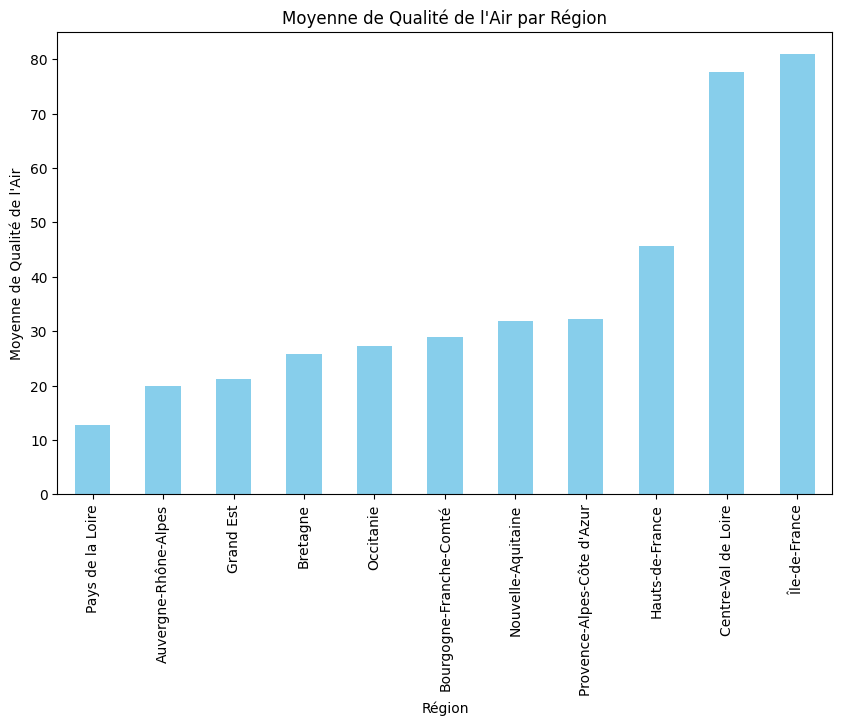

In [35]:
mean_values = df.groupby('Région')['Qualité Air'].mean()
mean_values = mean_values.sort_values()
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='skyblue')
plt.title('Moyenne de Qualité de l\'Air par Région')
plt.xlabel('Région')
plt.ylabel('Moyenne de Qualité de l\'Air')
plt.show()

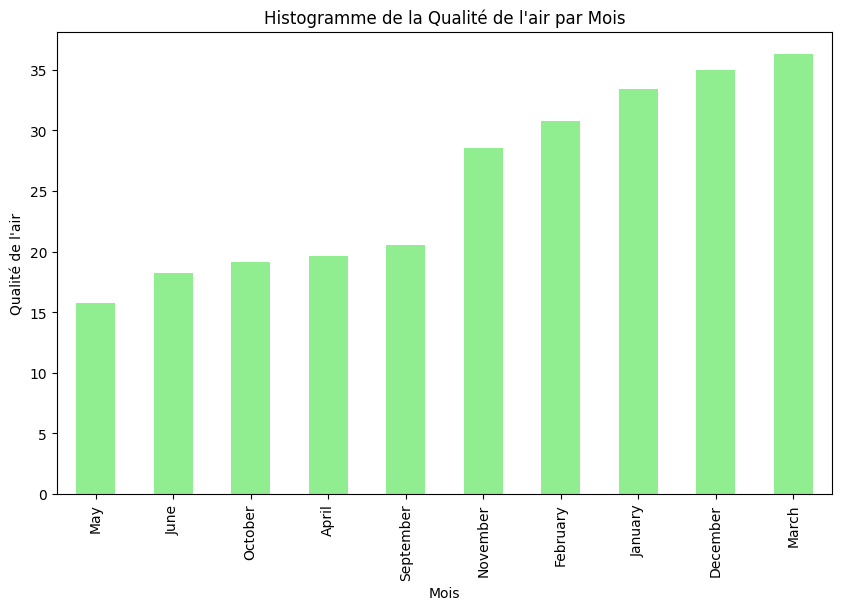

In [46]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])
mean_values = df.groupby('Month')['Qualité Air'].mean()
mean_values = mean_values.sort_values()
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='lightgreen')
plt.xlabel('Mois')
plt.ylabel('Qualité de l\'air')
plt.title('Histogramme de la Qualité de l\'air par Mois')
plt.show()

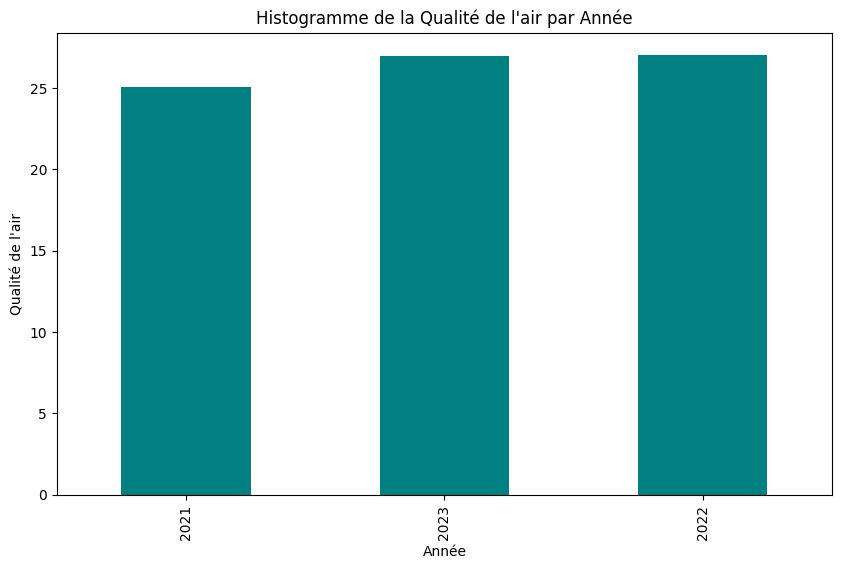

In [49]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
mean_values = df.groupby('Year')['Qualité Air'].mean()
mean_values = mean_values.sort_values()
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='teal')
plt.xlabel('Année')
plt.ylabel('Qualité de l\'air')
plt.title('Histogramme de la Qualité de l\'air par Année')
plt.show()

<Axes: xlabel='Vitesse moyenne', ylabel='Qualité Air'>

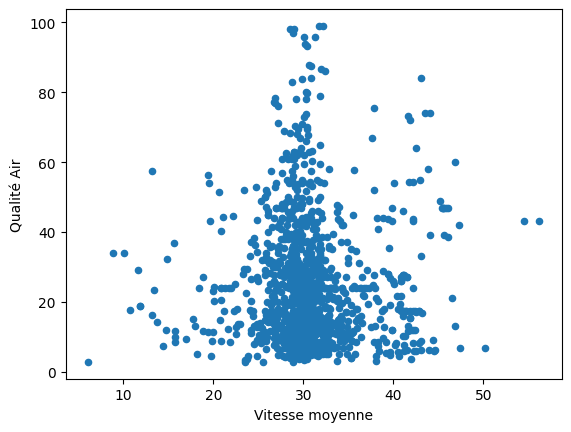

In [54]:
df_vitesse_qualite = df.loc[:,['Vitesse moyenne', 'Qualité Air']]
df_vitesse_qualite = df_vitesse_qualite.loc[(df_vitesse_qualite['Vitesse moyenne'] <= 60) & (df_vitesse_qualite['Qualité Air'] <= 100)]
df_sorted = df_vitesse_qualite.sort_values(by='Vitesse moyenne')
df_sorted.plot(kind='scatter', x='Vitesse moyenne', y='Qualité Air')

Variance expliquée par chaque composante : [0.28686499 0.21828168 0.11697908 0.11142955 0.08765017 0.07300553
 0.04967095 0.03818333 0.01467051 0.00168872 0.00157549]
DataFrame avec les composantes principales :
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     1.456253 -2.135909  0.537006 -0.626865 -0.604857  0.285002 -0.078451   
1     0.248238 -1.785924  0.379219 -0.712918 -0.248557  1.390337 -0.648010   
2     1.159658 -1.932639  0.104755 -0.860439 -0.540031  1.617731 -0.245517   
3     1.030896 -2.601179  0.099313 -0.939046 -0.289764  1.153481 -0.633613   
4    -1.255721 -1.736512  1.826389 -0.425709  0.217076  1.514763 -0.178796   
...        ...       ...       ...       ...       ...       ...       ...   
1308 -2.243257 -0.267815 -1.868369  1.405559 -0.354419 -1.558284  0.431205   
1309 -1.900564 -1.106540 -2.189180  0.205383  0.570000  0.999520  0.558396   
1310 -0.651229  2.518445 -1.242619 -0.009921  2.110747 -0.160086 -0.531581   
1311 -0

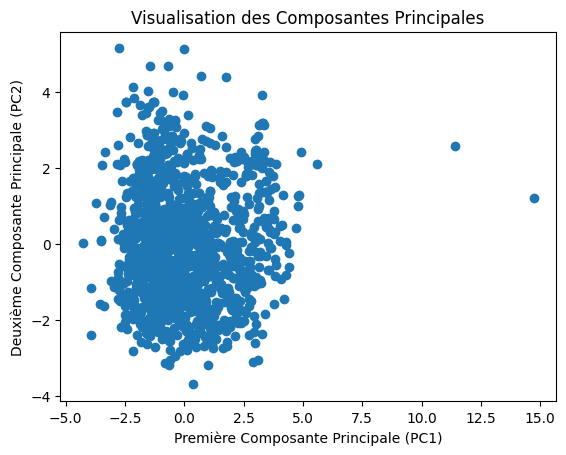

In [91]:
df_pour_pca = df.loc[:,['Distance', 'Secondes', 'Dénivelé', 'Vitesse moyenne', 'Vitesse max', 'Température', 'Humidité', 'Température ressentie', 'Vitesse vent', 'Qualité Air', 'Month']]


scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_pour_pca)

# Appliquer PCA
pca = PCA()
df_pca = pca.fit_transform(df_standardized)

# Créer un nouveau DataFrame avec les composantes principales
df_pca_result = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])

# Afficher les pourcentages de variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance_ratio)

# Afficher le DataFrame avec les composantes principales
print("DataFrame avec les composantes principales :\n", df_pca_result)

# Visualisation des deux premières composantes principales
plt.scatter(df_pca_result['PC1'], df_pca_result['PC2'])
plt.xlabel('Première Composante Principale (PC1)')
plt.ylabel('Deuxième Composante Principale (PC2)')
plt.title('Visualisation des Composantes Principales')
plt.show()


In [100]:
X = df_pour_pca.drop(['Vitesse moyenne','Vitesse max'], axis=1)  # Variables prédicteurs
y = df_pour_pca['Vitesse moyenne']  # Variable cible
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca = PCA(0.95)  # Choisissez le nombre de composantes en fonction de votre analyse
X_pca = pca.fit_transform(X_standardized)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=80)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :", mse)

Mean Squared Error : 23.82057841200829


In [109]:
pc_weights = pd.DataFrame(pca.components_[:7, :], columns=X.columns)
print("Poids attribués à chaque variable dans les deux premières composantes principales :\n", pc_weights)

Poids attribués à chaque variable dans les deux premières composantes principales :
    Distance  Secondes  Dénivelé  Température  Humidité  Température ressentie  \
0  0.569418  0.585865  0.546235    -0.087221  0.028426              -0.079183   
1  0.059639  0.016253  0.122377     0.617788 -0.363071               0.619931   
2 -0.088616 -0.095692  0.017054    -0.075456 -0.516424              -0.050967   
3 -0.056433 -0.010278 -0.001545    -0.023758  0.233389               0.016085   
4  0.106767  0.074531 -0.016262     0.149761 -0.120473               0.120738   
5 -0.031158  0.032307  0.042674    -0.281306 -0.724506              -0.305829   

   Vitesse vent  Qualité Air     Month  
0     -0.114402     0.026947 -0.075195  
1     -0.165522    -0.186629  0.145526  
2     -0.402693     0.478584 -0.562592  
3     -0.567763     0.486521  0.618349  
4      0.672564     0.676895  0.143985  
5      0.083402    -0.199399  0.501871  


In [98]:
pc1_weights = pca.components_[0]
weights_df = pd.DataFrame({'Variable': df_pour_pca.columns, 'Weight_PC1': pc1_weights})
print(weights_df.sort_values(by='Weight_PC1'))

                 Variable  Weight_PC1
8            Vitesse vent   -0.113865
10                  Month   -0.061708
6                Humidité   -0.047372
9             Qualité Air   -0.012507
5             Température    0.045224
7   Température ressentie    0.053621
3         Vitesse moyenne    0.286849
4             Vitesse max    0.381397
1                Secondes    0.482149
2                Dénivelé    0.486857
0                Distance    0.527884


In [110]:
X = df_pour_pca.drop(['Vitesse moyenne','Vitesse max', 'Dénivelé', 'Distance', 'Secondes'], axis=1)  # Variables prédicteurs
y = df_pour_pca['Vitesse moyenne']  # Variable cible
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca = PCA(0.95)  # Choisissez le nombre de composantes en fonction de votre analyse
X_pca = pca.fit_transform(X_standardized)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=80)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :", mse)
pc_weights = pd.DataFrame(pca.components_[:7, :], columns=X.columns)
print("Poids attribués à chaque variable dans les deux premières composantes principales :\n", pc_weights)

Mean Squared Error : 27.73323919865185
Poids attribués à chaque variable dans les deux premières composantes principales :
    Température  Humidité  Température ressentie  Vitesse vent  Qualité Air  \
0     0.626794 -0.361327               0.627658     -0.143830    -0.191383   
1    -0.069173 -0.511050              -0.041896     -0.444898     0.469732   
2    -0.023657  0.249940               0.017029     -0.581652     0.460315   
3     0.137106 -0.137412               0.107897      0.661830     0.697902   
4    -0.285978 -0.725796              -0.308944      0.058614    -0.208905   

      Month  
0  0.159068  
1 -0.560093  
2  0.621667  
3  0.159974  
4  0.498911  


In [114]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.39225015, 0.20835639, 0.16881453, 0.13670862, 0.09095087])